# Kütüphaneler

In [1]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Veriyi Yükleme

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(224,224),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(224,224),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Veri Arttırma

In [3]:
veri_arttırma=Sequential([
    
#layers.experimental.preprocessing.Resizing(500,500),# Yeneiden boyutlandırma 
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),# Görüntüyü yatay ve dikey olarak rastgele çevirir 
layers.experimental.preprocessing.RandomCrop(100,100),# Hedef yükseklik ve genişlik için görüntüleri rastgele kırpar
layers.experimental.preprocessing.RandomContrast(factor=1),# Bir görüntünün kontrastını rastgele bir faktörle ayarlar
layers.experimental.preprocessing.RandomRotation(factor=0.2),# Her görüntüyü rastgele döndürür
layers.experimental.preprocessing.RandomZoom(height_factor=0.7,width_factor=0.7),# Eğitim sırasında her görüntüyü rastgele yakınlaştırır
layers.experimental.preprocessing.RandomTranslation(height_factor=0.2,width_factor=0.2)# Eğitim sırasında her görüntüyü rastgele çevirir
])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


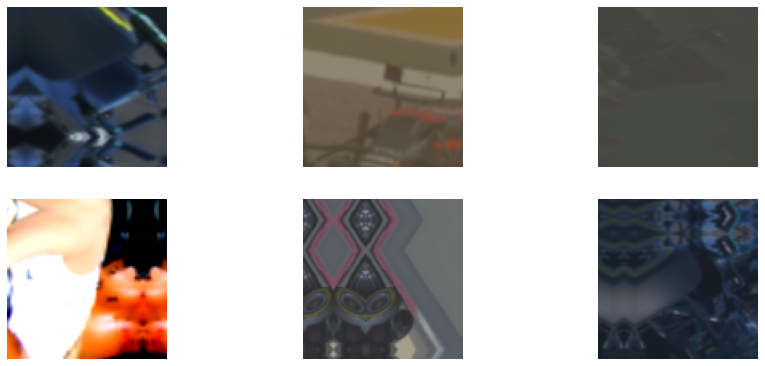

In [4]:
img,_=test_datagen.next()
image = tf.expand_dims(img,0)
plt.figure(figsize=(15,10))
for i in range(6):
    
    img,_=test_datagen.next()
    aug_image = veri_arttırma(img)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(aug_image[0])
    plt.axis('off') 

# Model Oluşumu

In [5]:
model=Sequential()

model.add(veri_arttırma)

model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8,activation="elu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))

# Model Eğitimi

In [6]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [7]:
model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])

In [8]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 11s 51ms/step - loss: 1.3274 - accuracy: 0.2976 - val_loss: 1.6442 - val_accuracy: 0.2857
Epoch 2/5
126/126 [==============================] - 6s 50ms/step - loss: 1.2205 - accuracy: 0.4167 - val_loss: 1.7520 - val_accuracy: 0.2500
Epoch 3/5
126/126 [==============================] - 6s 48ms/step - loss: 1.1874 - accuracy: 0.4563 - val_loss: 1.3161 - val_accuracy: 0.3214
Epoch 4/5
126/126 [==============================] - 6s 51ms/step - loss: 1.1545 - accuracy: 0.4722 - val_loss: 1.4737 - val_accuracy: 0.4643
Epoch 5/5
126/126 [==============================] - 6s 48ms/step - loss: 1.1566 - accuracy: 0.5159 - val_loss: 1.3380 - val_accuracy: 0.3929


In [9]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]
epoch=range(1,len(acc)+1)

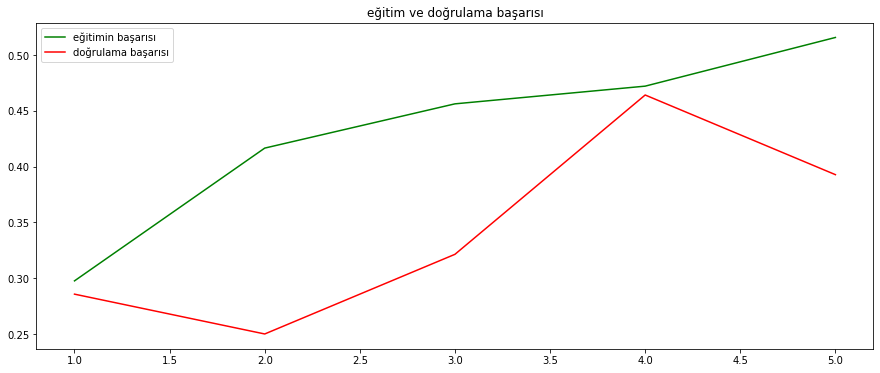

In [10]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("eğitimin başarısı"),color="g")
plt.plot(epoch,val_acc,label=("doğrulama başarısı"),color="r")
plt.title("eğitim ve doğrulama başarısı")
plt.legend()

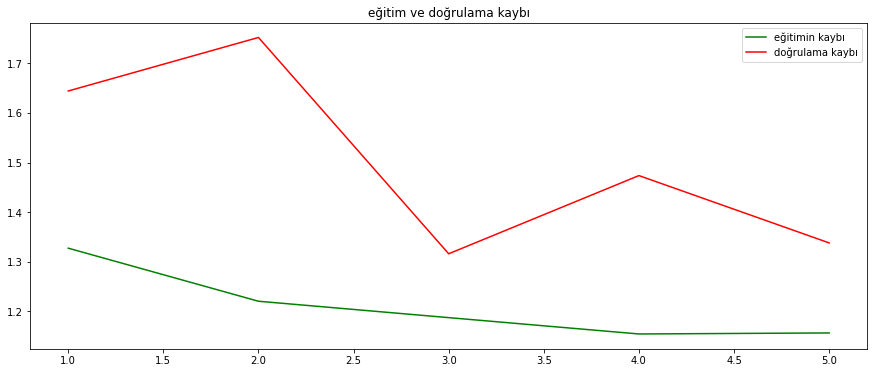

In [11]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("eğitimin kaybı"),color="g")
plt.plot(epoch,val_loss,label=("doğrulama kaybı"),color="r")
plt.title("eğitim ve doğrulama kaybı")
plt.legend()